- Criar estrutua de dados extensível que suporte os dados abaixo
- Adicionar coluna que pode ser usada como centróide
- Clusterização

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import choice, randint

In [12]:
nomes = [
    "João",
    "Maria",
    "Pedro",
    "Ana",
    "Lucas",
    "Fernanda",
    "Rafael",
    "Juliana",
    "Bruno",
    "Larissa",
    "Carla",
    "Thiago",
    "Catarina",
    "Felipe",
    "Mariana",
    "Gustavo",
    "Isabela",
    "Eduardo",
    "Sofia",
    "Luana",
]

In [13]:
def calculate_distance(point, centroid):
    distance = np.sqrt((point['nota'] - centroid['nota'])**2 + (point['faltas'] - centroid['faltas'])**2)
    return distance

In [14]:
alunos = [{
    "name": choice(nomes),
    "anos": randint(18, 22),
    "nota": randint(0, 100),
    "faltas": randint(0, 100)
} for _ in range(1000)]

centroid1 = choice(alunos).copy()
centroid2 = choice(alunos).copy()

for _ in range(1000):
    for aluno in alunos:
        dist1 = calculate_distance(aluno, centroid1)
        dist2 = calculate_distance(aluno, centroid2)
        aluno['cluster'] = 1 if dist1 < dist2 else 2

    cluster1 = [a for a in alunos if a['cluster'] == 1]
    cluster2 = [a for a in alunos if a['cluster'] == 2]

    if cluster1:
        centroid1['nota'] = sum(a['nota'] for a in cluster1) / len(cluster1)
        centroid1['anos'] = sum(a['anos'] for a in cluster1) / len(cluster1)
        centroid1['faltas'] = sum(a['faltas'] for a in cluster1) / len(cluster1)
    if cluster2:
        centroid2['nota'] = sum(a['nota'] for a in cluster2) / len(cluster2)
        centroid1['anos'] = sum(a['anos'] for a in cluster1) / len(cluster1)
        centroid2['faltas'] = sum(a['faltas'] for a in cluster2) / len(cluster2)


In [15]:
df = pd.DataFrame(alunos)
df

,name,anos,nota,faltas,cluster
0,Felipe,20,77,70,2
1,Isabela,19,83,79,2
2,Lucas,20,32,63,1
3,Pedro,21,24,68,1
4,Fernanda,20,75,22,2
...,...,...,...,...,...
995,Lucas,18,79,59,2
996,Carla,20,32,73,1
997,Fernanda,20,31,18,1
998,Ana,21,58,58,2


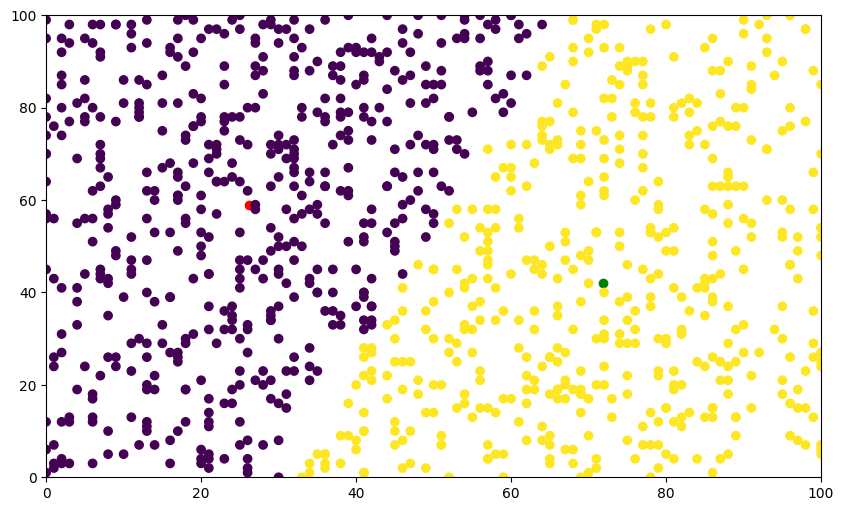

In [16]:
plt.figure(figsize=(10, 6))
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.scatter(x=centroid1['nota'], y=centroid1['faltas'], c='red')
plt.scatter(x=centroid2['nota'], y=centroid2['faltas'], c='green')

plt.scatter(x=df['nota'], y=df['faltas'], c=df['cluster'])

---

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import choice, randint

In [18]:
nomes = [
    "João",
    "Maria",
    "Pedro",
    "Ana",
    "Lucas",
    "Fernanda",
    "Rafael",
    "Juliana",
    "Bruno",
    "Larissa",
    "Carla",
    "Thiago",
    "Catarina",
    "Felipe",
    "Mariana",
    "Gustavo",
    "Isabela",
    "Eduardo",
    "Sofia",
    "Luana",
]

In [19]:
def calculate_distance(point, centroid):
    distance = np.sqrt((point['nota'] - centroid['nota'])**2 + (point['faltas'] - centroid['faltas'])**2)
    return distance

In [20]:
k_clusters = int(input('How many centroids do you want me to create? '))

How many centroids do you want me to create? 5


In [21]:
alunos = [{
    "name": choice(nomes),
    "anos": randint(18, 22),
    "nota": randint(0, 100),
    "faltas": randint(0, 100)
} for _ in range(1000)]

centroids = {}
for i in range(k_clusters):
    chosen_student = choice(alunos)
    centroids[i] = {
        'nota': chosen_student['nota'],
        'anos': chosen_student['anos'],
        'faltas': chosen_student['faltas']
    }

for i in range(1000):
    for aluno in alunos:
        min_dist = float('inf')
        assigned_cluster_id = -1

        for cluster_id, centroid_data in centroids.items():
            dist = calculate_distance(aluno, centroid_data)

            if dist < min_dist:
                min_dist = dist
                assigned_cluster_id = cluster_id

        aluno['cluster'] = assigned_cluster_id

    clusters_data = {
        cluster_id: [] for cluster_id in centroids.keys()
    }

    for aluno in alunos:
        if aluno['cluster'] in clusters_data:
            clusters_data[aluno['cluster']].append(aluno)

    for cluster_id, students_in_cluster in clusters_data.items():
        if students_in_cluster:
            centroids[cluster_id]['nota'] = sum(a['nota'] for a in students_in_cluster) / len(students_in_cluster)
            centroids[cluster_id]['anos'] = sum(a['anos'] for a in students_in_cluster) / len(students_in_cluster)
            centroids[cluster_id]['faltas'] = sum(a['faltas'] for a in students_in_cluster) / len(students_in_cluster)
        else:
            chosen_student = choice(alunos)
            centroids[cluster_id] = {
                "anos": chosen_student['anos'],
                "nota": chosen_student['nota'],
                "faltas": chosen_student['faltas']
            }

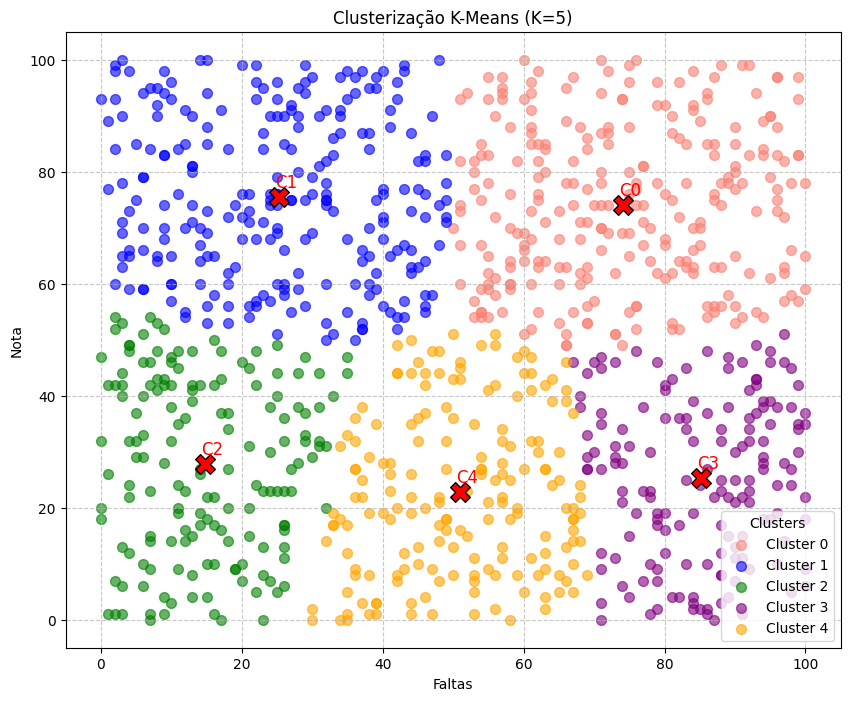

In [22]:
df_alunos = pd.DataFrame(alunos)

df_centroids = pd.DataFrame.from_dict(centroids, orient='index')
df_centroids['cluster_id'] = df_centroids.index # Adiciona o ID do cluster como uma coluna

plt.figure(figsize=(10, 8)) # Define o tamanho da figura

colors = [
    'blue', 'green', 'purple', 'orange', 'salmon',
    'cyan', 'magenta', 'lime', 'teal', 'navy'
]

if k_clusters > len(colors):
    cmap = plt.cm.get_cmap('viridis', k_clusters)
    cluster_colors = [cmap(i) for i in range(k_clusters)]
else:
    cluster_colors = colors[:k_clusters]


for cluster_id in sorted(df_alunos['cluster'].unique()):
    cluster_data = df_alunos[df_alunos['cluster'] == cluster_id]
    color_index = cluster_id - 1 # Se os clusters começam de 1
    plt.scatter(
        cluster_data['faltas'],
        cluster_data['nota'],
        color=cluster_colors[color_index],
        label=f'Cluster {cluster_id}',
        alpha=0.6,
        s=50
    )

for index, centroid in df_centroids.iterrows():
    plt.scatter(
        centroid['faltas'],
        centroid['nota'],
        color='red',
        marker='X',
        s=200,
        edgecolors='black',
        linewidths=1
    )
    plt.text(
        centroid['faltas'] + 1,
        centroid['nota'] + 1,
        f'C{index}',
        fontsize=12,
        color='red',
        ha='center',
        va='bottom'
    )


plt.title(f'Clusterização K-Means (K={k_clusters})')
plt.xlabel('Faltas')
plt.ylabel('Nota')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Clusters')
plt.show()